In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif


In [4]:
import pandas as pd

header = pd.read_csv(
    "kagglev01-train.csv",
    nrows=0
)

len(header.columns), header.columns.tolist()

(102,
 ['id',
  'f1',
  'f2',
  'f3',
  'f4',
  'f5',
  'f6',
  'f7',
  'f8',
  'f9',
  'f10',
  'f11',
  'f12',
  'f13',
  'f14',
  'f15',
  'f16',
  'f17',
  'f18',
  'f19',
  'f20',
  'f21',
  'f22',
  'f23',
  'f24',
  'f25',
  'f26',
  'f27',
  'f28',
  'f29',
  'f30',
  'f31',
  'f32',
  'f33',
  'f34',
  'f35',
  'f36',
  'f37',
  'f38',
  'f39',
  'f40',
  'f41',
  'f42',
  'f43',
  'f44',
  'f45',
  'f46',
  'f47',
  'f48',
  'f49',
  'f50',
  'f51',
  'f52',
  'f53',
  'f54',
  'f55',
  'f56',
  'f57',
  'f58',
  'f59',
  'f60',
  'f61',
  'f62',
  'f63',
  'f64',
  'f65',
  'f66',
  'f67',
  'f68',
  'f69',
  'f70',
  'f71',
  'f72',
  'f73',
  'f74',
  'f75',
  'f76',
  'f77',
  'f78',
  'f79',
  'f80',
  'f81',
  'f82',
  'f83',
  'f84',
  'f85',
  'f86',
  'f87',
  'f88',
  'f89',
  'f90',
  'f91',
  'f92',
  'f93',
  'f94',
  'f95',
  'f96',
  'f97',
  'f98',
  'f99',
  'f100',
  'target'])

In [5]:
def load_clean_csv(path):
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        reader = csv.reader(f)
        rows = list(reader)

    header = rows[0]
    n_cols = len(header)

    clean_rows = []
    bad_rows = 0

    for row in rows[1:]:
        if len(row) == n_cols:
            clean_rows.append(row)
        else:
            bad_rows += 1

    print(f"Expected columns: {n_cols}")
    print(f"Bad rows skipped: {bad_rows}")

    return pd.DataFrame(clean_rows, columns=header)


In [7]:
import csv
train_df = load_clean_csv("kagglev01-train.csv")
test_df  = load_clean_csv("kagglev01-test.csv")

print(train_df.shape)
print(test_df.shape)


Expected columns: 102
Bad rows skipped: 0
Expected columns: 101
Bad rows skipped: 5
(10000, 102)
(9996, 101)


In [8]:
train_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f92,f93,f94,f95,f96,f97,f98,f99,f100,target
0,1,1.94,0.71,4.72,-1.88,-3.23,1.94,-11.19,-3.64,-0.13,...,3.21,-0.21,0.68,1.78,4.39,-4.11,-4.11,0.71,-1.88,1
1,2,2.92,1.46,0.13,-8.12,-5.07,2.92,-7.98,-0.47,0.83,...,2.04,-2.6,3.27,0.91,1.68,-1.76,-1.76,1.46,-8.12,18
2,3,-1.67,-1.01,-0.41,10.73,-3.5,-1.67,0.04,0.29,0.51,...,-6.27,3.64,-3.11,1.63,12.72,2.37,2.37,-1.01,10.73,13
3,4,3.66,-3.37,-0.87,-10.04,-2.77,3.66,0.29,2.11,-1.27,...,-2.66,3.42,2.75,-0.13,0.88,0.26,0.26,-3.37,-10.04,9
4,5,9.68,-4.61,0.45,5.01,0.25,9.68,4.42,-3.54,0.4,...,-6.67,-0.81,-3.76,0.08,-2.14,1.88,1.88,-4.61,5.01,7


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 102 entries, id to target
dtypes: object(102)
memory usage: 7.8+ MB


In [10]:
train_df.describe().T

,count,unique,top,freq
id,10000,10000,9984,1
f1,10000,2721,-0.03,15
f2,10000,1385,-0.3,26
f3,10000,1373,-0.02,29
f4,10000,2937,-0.56,14
...,...,...,...,...
f97,10000,1394,0.33,26
f98,10000,1394,0.33,26
f99,10000,1385,-0.3,26
f100,10000,2937,-0.56,14


In [13]:
train_df['target'].value_counts()

,count
target,
1,551
7,529
8,517
2,513
5,512
3,512
16,510
12,509
9,506


In [14]:
train_df['target'].value_counts(normalize=True)

,proportion
target,
1,0.0551
7,0.0529
8,0.0517
2,0.0513
5,0.0512
3,0.0512
16,0.0510
12,0.0509
9,0.0506


(to visualize class imbalance)

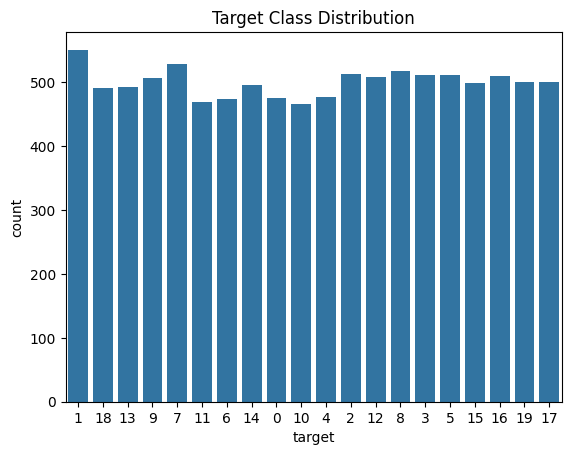

In [16]:
sns.countplot(x=train_df['target'])
plt.title("Target Class Distribution")
plt.show()

missing value analysis

In [17]:
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0


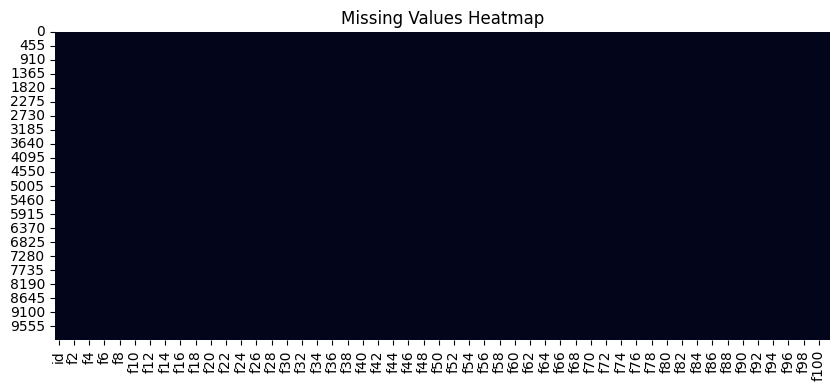

In [18]:
plt.figure(figsize=(10,4))
sns.heatmap(train_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Separate numeric & categorical columns (there was originally a problem here)

In [24]:
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = train_df.select_dtypes(include=["object"]).columns

num_cols
for col in train_df.columns:
    if col not in ['target', 'id']:
        train_df[col] = pd.to_numeric(train_df[col], errors="ignore")
        test_df[col]  = pd.to_numeric(test_df[col], errors="ignore")


/tmp/ipython-input-3572356710.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  train_df[col] = pd.to_numeric(train_df[col], errors="ignore")
/tmp/ipython-input-3572356710.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  test_df[col]  = pd.to_numeric(test_df[col], errors="ignore")


In [26]:
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = train_df.select_dtypes(include=["object"]).columns

len(num_cols), len(cat_cols)
train_df[num_cols].head()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,1.94,0.71,4.72,-1.88,-3.23,1.94,-11.19,-3.64,-0.13,-4.11,...,1.05,3.21,-0.21,0.68,1.78,4.39,-4.11,-4.11,0.71,-1.88
1,2.92,1.46,0.13,-8.12,-5.07,2.92,-7.98,-0.47,0.83,-1.76,...,-1.52,2.04,-2.60,3.27,0.91,1.68,-1.76,-1.76,1.46,-8.12
2,-1.67,-1.01,-0.41,10.73,-3.50,-1.67,0.04,0.29,0.51,2.37,...,-0.07,-6.27,3.64,-3.11,1.63,12.72,2.37,2.37,-1.01,10.73
3,3.66,-3.37,-0.87,-10.04,-2.77,3.66,0.29,2.11,-1.27,0.26,...,-1.22,-2.66,3.42,2.75,-0.13,0.88,0.26,0.26,-3.37,-10.04
4,9.68,-4.61,0.45,5.01,0.25,9.68,4.42,-3.54,0.40,1.88,...,-1.30,-6.67,-0.81,-3.76,0.08,-2.14,1.88,1.88,-4.61,5.01


OUTLIER SANITY CHECK

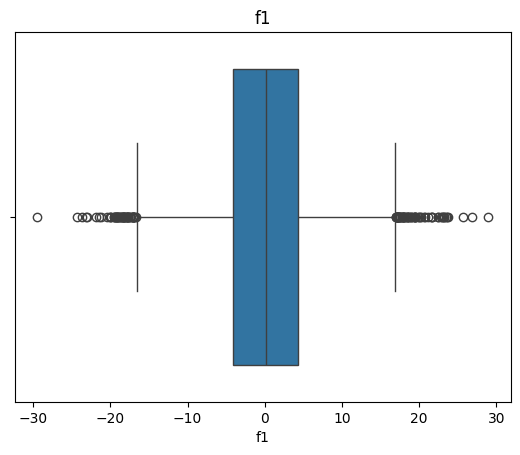

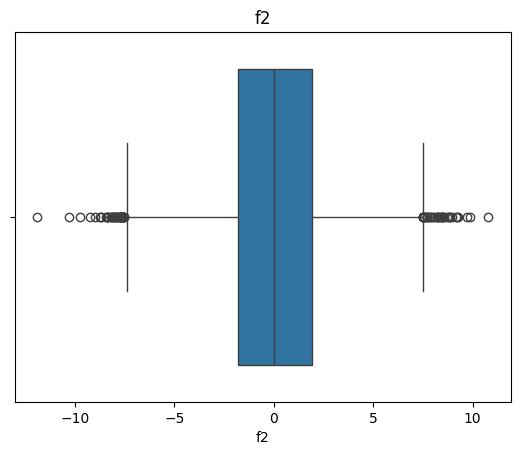

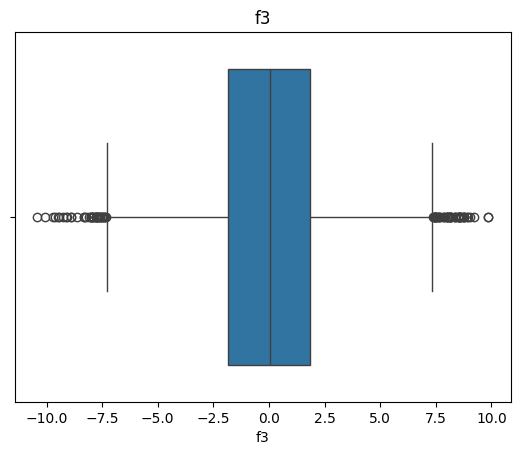

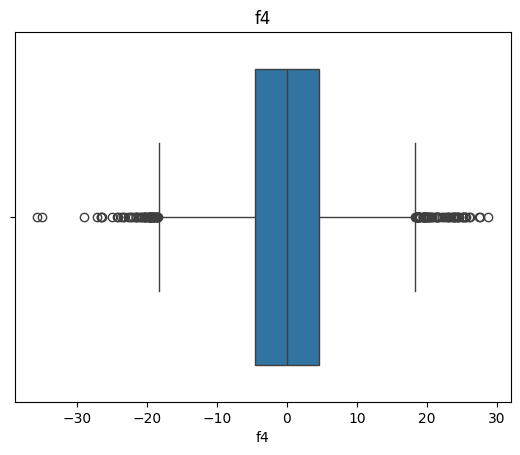

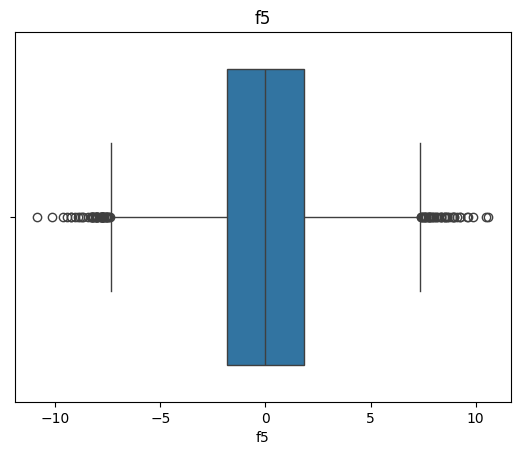

In [27]:
for col in num_cols[:5]:  # just sample few
    sns.boxplot(x=train_df[col])
    plt.title(col)
    plt.show()


phase 2 : Correlation matrix (remove redundant features)

the follwing corr is highly filtered and excludes: low_mi and redundant features

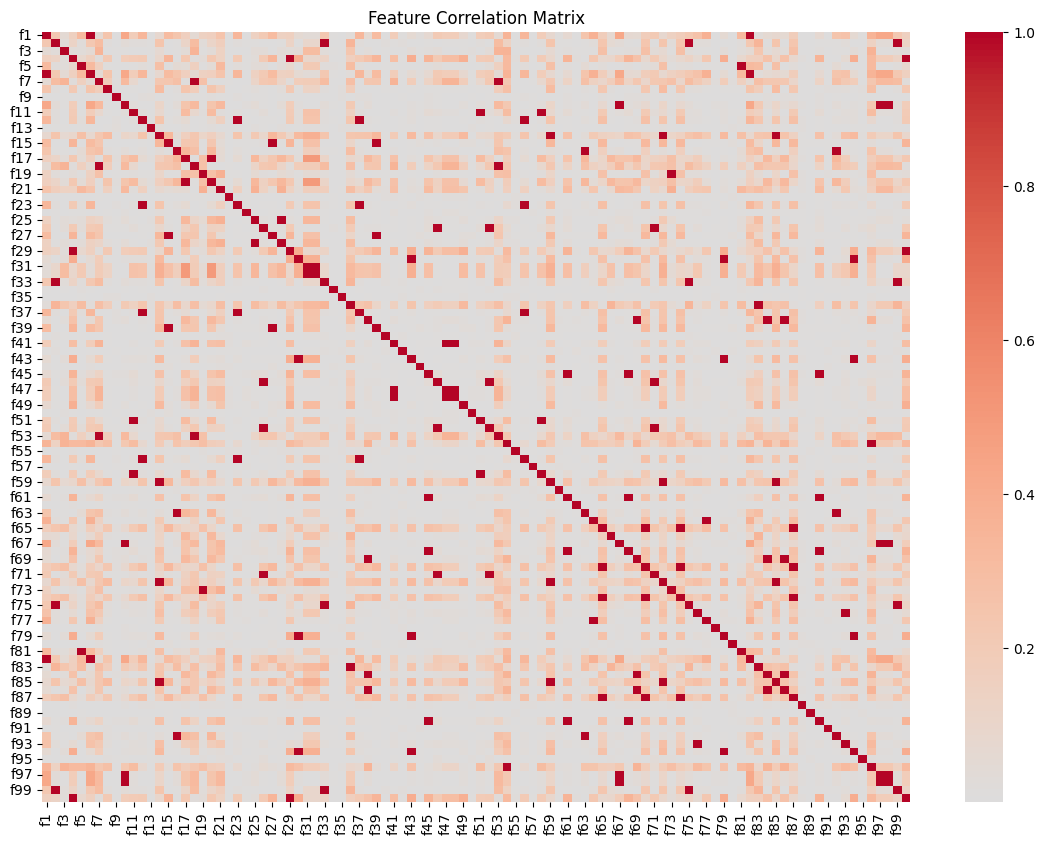

In [29]:
corr = train_df[num_cols].corr().abs()
corr.shape

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [31]:
TARGET = "target"
ID_COL = "id"
X = train_df.drop(columns=[TARGET, ID_COL])
y = train_df[TARGET]
X.shape, y.shape


((10000, 100), (10000,))

In [32]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(
    X,
    y,
    random_state=42
)


In [33]:
mi_df = (
    pd.DataFrame({
        "feature": X.columns,
        "mi_score": mi_scores
    })
    .sort_values("mi_score", ascending=False)
)

mi_df.head(15)


,feature,mi_score
3,f4,0.021477
99,f100,0.019909
19,f20,0.018624
28,f29,0.018129
7,f8,0.017253
16,f17,0.016873
20,f21,0.015506
57,f58,0.015431
50,f51,0.013780
10,f11,0.013687


In [34]:
low_mi_features = mi_df[mi_df["mi_score"] < 0.001]["feature"]
train_df.drop(columns=low_mi_features, inplace=True)
test_df.drop(columns=low_mi_features, inplace=True)

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import lightgbm as lgb

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [42]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 100
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -2.898152
[LightGBM] [Info] Start training from score -3.065618
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -2.978384
[LightGBM] [Info] Start training from score -3.010846
[LightGBM] [Info] Start training from score -3.003261
[LightGBM] [Info] Start training from score -2.998235
[LightGBM] [Info] Start training from score -2.975930
[LightGBM] [Info] Start training from score -2.993235
[LightGBM] [Info] Start training from score -3.013387
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -2.971040
[LightGB

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
               n_jobs=-1, num_class=20, objective='multiclass', random_state=42,
               subsample=0.8)

In [51]:
hasattr(lgb_model, "booster_")


False

In [52]:
# Rebuild X and y cleanly
X = train_df.drop(columns=["target", "id"])
y = train_df["target"]

# Force numeric
X = X.apply(pd.to_numeric, errors="coerce")
X.fillna(X.median(), inplace=True)

# Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Model
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=y.nunique(),
    n_estimators=300,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

# Fit
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_val)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 64
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -2.898152
[LightGBM] [Info] Start training from score -3.065618
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -2.978384
[LightGBM] [Info] Start training from score -3.010846
[LightGBM] [Info] Start training from score -3.003261
[LightGBM] [Info] Start training from score -2.998235
[LightGBM] [Info] Start training from score -2.975930
[LightGBM] [Info] Start training from score -2.993235
[LightGBM] [Info] Start training from score -3.013387
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -2.971040
[LightGBM

In [43]:
lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=y.nunique(),
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
y_pred_lgb = lgb_model.predict(X_val)
lgb_acc = accuracy_score(y_val, y_pred_lgb)

lgb_acc


NotFittedError: Estimator not fitted, call fit before exploiting the model.